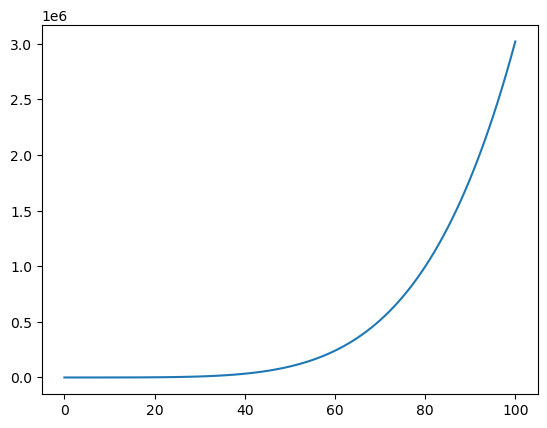

1-element Array{Int32,1}:
 1

In [37]:
using PyPlot

x = collect(0.0:1.0:100)
y = 2.0.*x.^2 .- 100.0 + x .+0.0003.*x.^5

plot(x,y)

ese = y./100

NN = Int32(length(y))
wx = 1. ./(ese.^2) # relative variance of observations
wy = zeros(1).+1. # systematic errors... not used so put them to 1
VAL = ese.^2

M = 2
N = Int32(length(x))
K = Int32(1) # number of y columns
MD = Int32(2) #spline mode
NC = Int32(length(y))

c = ones(NN,NC)
WK = ones(6*(N*M+1)+N,1)
IER=Int32[1]


In [38]:
typeof(NC)

Int32

In [39]:
#ccall( (:gcvspl_, "./libgcvspl.so"), Void, (Ptr{Float64},Ptr{Float64},Ptr{Clonglong},Ptr{Float64},Ptr{Float64},Ptr{Clonglong},Ptr{Clonglong},Ptr{Clonglong},Ptr{Clonglong},Ptr{Float64},Ptr{Float64},Ptr{Clonglong},Ptr{Float64},Ptr{Clonglong}),x,y,&NN,wx,wy,&M,&N,&K,&MD,VAL,c,&NC,WK,IER)
ccall( (:gcvspl_, "./libgcvspl.so"), Cvoid, 
    (Ptr{Float64},Ptr{Float64},Ref{Cint},Ptr{Float64},Ptr{Float64},Ref{Cint},Ref{Cint},Ref{Cint},Ref{Cint},Ptr{Float64},Ref{Float64},Ref{Cint},Ref{Float64},Ref{Cint}),
    x,y,N,wx,wy,M,N,K,MD,VAL,c,NC,WK,IER)
y_calc = zeros(size(x,1),1)
IDER = Int32(0)
l= Int32(1)
q = zeros(2*M,1)


4×1 Array{Float64,2}:
 0.0
 0.0
 0.0
 0.0

In [35]:
typeof(l)

Int32

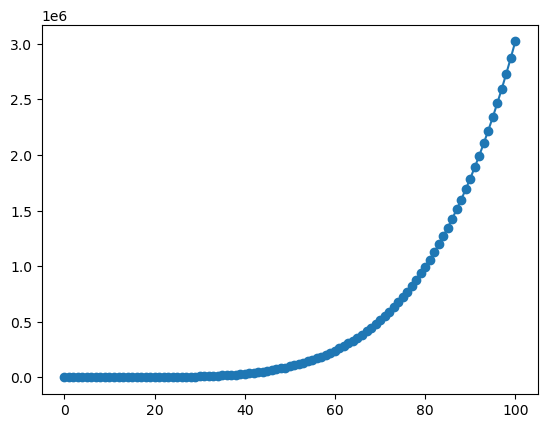

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f94238457c0>

In [36]:
for i =1:size(y_calc,1)
    y_calc[i] = ccall( (:splder_, "./libgcvspl.so"), 
        Float64, (Ref{Cint},Ref{Cint},Ref{Cint},Ref{Float64},Ptr{Float64},Ptr{Float64},Ref{Cint},Ptr{Float64}),
        IDER, M, N, x[i], x, c, l, q)
end
figure()
scatter(x,y)
plot(x,y_calc)


In [15]:
replace("Elementary, my dear Watson!", r"e" => "")

"Elmntary, my dar Watson!"